In [1]:
## Business Objective
# The consumer finance company wants to know what are the driving factors behind 
# loan default or the variables which are strong indicators of default. The company plans to use our
# findings for portfolio risk assesment.

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # This will ignore version mismatch warnings

In [3]:
#Reading the loan.csv file to start the analysis
loan = pd.read_csv("F:\LCCS\loan.csv")

In [4]:
# Viewing the top 5 rows using head()
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.shape

(39717, 111)

In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
#Cleaning the data

In [10]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
# We see that the last few columns are blank

In [12]:
100*(loan.isnull().sum()/len(loan.index)) #checking the % null values in each column

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [13]:
mis_columns=loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]

In [14]:
print(mis_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [15]:
#Now lets drop all the columns with missing or no data

In [16]:
df= loan.drop(mis_columns,axis=1)

In [17]:
df.shape

(39717, 55)

In [18]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [19]:
100*(df.isnull().sum()/len(df.index)) #checking the % null values in each column

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [20]:
# mths_since_last_delinq field is the months since last default (Need to decide to use this column or not as 64% null values)

In [21]:
df=df.drop(['desc'], axis=1) # dropping 'desc' column as we dont need description

In [22]:
df.shape

(39717, 54)

In [23]:
#missing values in rows
df.isnull().sum(axis=1)

0        2
1        1
2        2
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [24]:
len(df[df.isnull().sum(axis=1)>5].index) #checking how many rows have more than 5 null values

2

In [25]:
df= df.drop(df[df.isnull().sum(axis=1)>5].index, axis=0) #Dropping the rows which has more than 5 null values

In [26]:
len(df[df.isnull().sum(axis=1)>5].index)

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39715 non-null  int64  
 1   member_id                   39715 non-null  int64  
 2   loan_amnt                   39715 non-null  int64  
 3   funded_amnt                 39715 non-null  int64  
 4   funded_amnt_inv             39715 non-null  float64
 5   term                        39715 non-null  object 
 6   int_rate                    39715 non-null  object 
 7   installment                 39715 non-null  float64
 8   grade                       39715 non-null  object 
 9   sub_grade                   39715 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38640 non-null  object 
 12  home_ownership              39715 non-null  object 
 13  annual_inc                  397

In [28]:
# As int_rate is an object we need to convert it into a float as we need it

In [29]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [30]:
df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [31]:
df.info() #int_rate has been converted to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39715 non-null  int64  
 1   member_id                   39715 non-null  int64  
 2   loan_amnt                   39715 non-null  int64  
 3   funded_amnt                 39715 non-null  int64  
 4   funded_amnt_inv             39715 non-null  float64
 5   term                        39715 non-null  object 
 6   int_rate                    39715 non-null  float64
 7   installment                 39715 non-null  float64
 8   grade                       39715 non-null  object 
 9   sub_grade                   39715 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38640 non-null  object 
 12  home_ownership              39715 non-null  object 
 13  annual_inc                  397

In [32]:
#We also need to convert the emp_length into a int as its a vital data

In [33]:
df.iloc[2]

id                                                                      1077175
member_id                                                               1313524
loan_amnt                                                                  2400
funded_amnt                                                                2400
funded_amnt_inv                                                          2400.0
term                                                                  36 months
int_rate                                                                  15.96
installment                                                               84.33
grade                                                                         C
sub_grade                                                                    C5
emp_title                                                                   NaN
emp_length                                                            10+ years
home_ownership                          

In [34]:
# Employee length is 10+ years so need to take the digits
#now to apply regular expressin on that column so need to remove all the null values

In [35]:
df=df[~df['emp_length'].isnull()]

In [36]:
import re

In [37]:
df['emp_length']= df['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])

In [38]:
df['emp_length']=df['emp_length'].apply(lambda x:pd.to_numeric(x)) #converted it to int

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38640 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38640 non-null  int64  
 1   member_id                   38640 non-null  int64  
 2   loan_amnt                   38640 non-null  int64  
 3   funded_amnt                 38640 non-null  int64  
 4   funded_amnt_inv             38640 non-null  float64
 5   term                        38640 non-null  object 
 6   int_rate                    38640 non-null  float64
 7   installment                 38640 non-null  float64
 8   grade                       38640 non-null  object 
 9   sub_grade                   38640 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38640 non-null  int64  
 12  home_ownership              38640 non-null  object 
 13  annual_inc                  386

In [40]:
#Analysis of data

In [41]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [42]:
df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [43]:
df.shape

(38640, 54)

In [44]:
df['loan_status'].value_counts()

Fully Paid     32143
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [45]:
df1=df[df['loan_status']!='Current']

In [46]:
df1['loan_status']= df['loan_status'].apply(lambda x: 0 if x=="Fully Paid" else 1)

In [47]:
#Bivariate Analysis

In [48]:
df1['loan_status']=df1['loan_status'].apply(lambda x:pd.to_numeric(x))

In [49]:
df1['loan_status'].value_counts()

0    32143
1     5399
Name: loan_status, dtype: int64

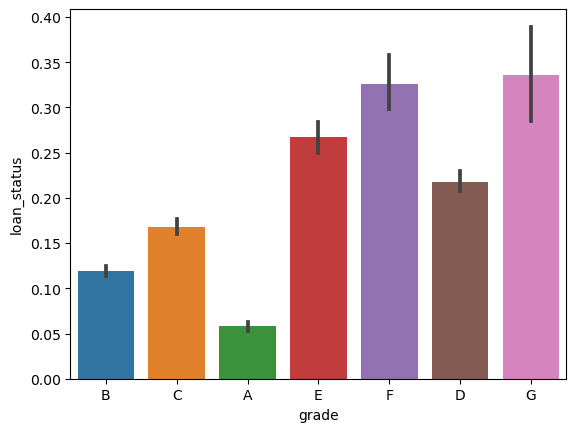

In [50]:
sns.barplot(x='grade', y='loan_status', data=df1)
plt.show()

In [51]:
# Observation: Grade D-G tend to default

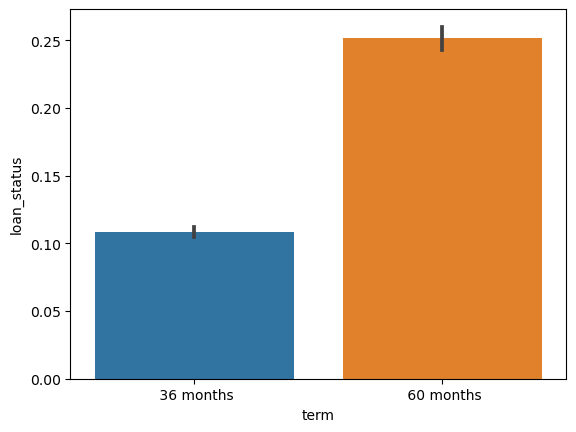

In [52]:
sns.barplot(x='term', y='loan_status', data=df1)
plt.show()

In [53]:
# Observation: Longer the term increases the chance of default

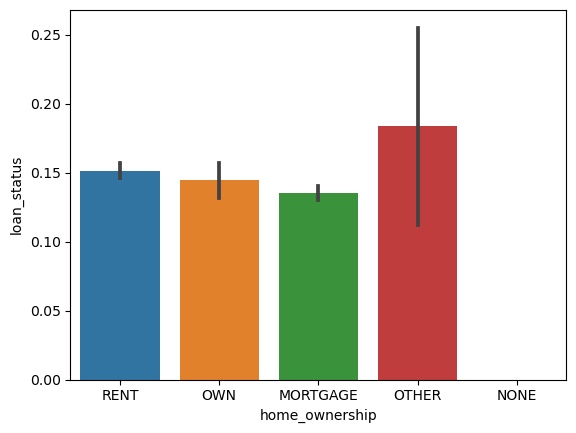

In [54]:
sns.barplot(x='home_ownership', y='loan_status', data=df1)
plt.show()

In [55]:
# Observation: Home ownership dosent directly relate to default

In [56]:
np.mean(df1['loan_status']) #Average default rate is 14.38%

0.14381226359810345

In [57]:
df1['loan_amnt'].head()

0     5000
1     2500
2     2400
3    10000
5     5000
Name: loan_amnt, dtype: int64

In [58]:
df1['loan_amnt'].min()

500

In [59]:
df1['loan_amnt'].max()

35000

In [60]:
def fun(n):
    if n<3000:
        return 'low'
    elif n>=3000 and n<10000:
        return 'medium'
    elif n>=10000 and n<20000:
        return 'high'
    elif n>=20000:
        return 'very high'

In [61]:
df1['loan_amnt']=df1['loan_amnt'].apply(lambda x:fun(x))

In [62]:
df1['loan_amnt'].value_counts()

medium       16113
high         13058
very high     5724
low           2647
Name: loan_amnt, dtype: int64

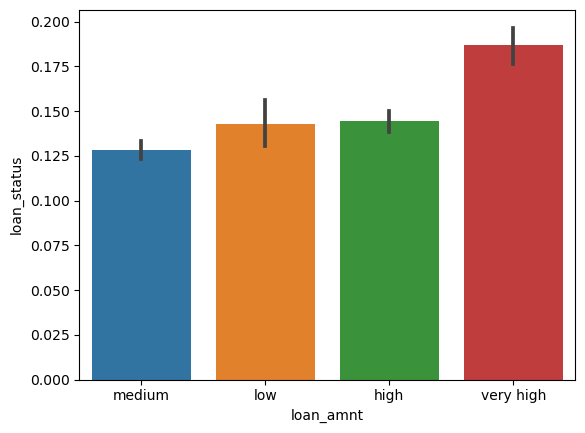

In [63]:
sns.barplot(x='loan_amnt', y='loan_status', data=df1)
plt.show()

In [64]:
# Observation: Higher the loan amount higher the chance of default for loans above 20K

In [65]:
df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [66]:
df1['int_rate'].min()

5.42

In [67]:
df1['int_rate'].max()

24.4

In [68]:
def fun1(n):
    if n<10:
        return 'low'
    elif n>=10 and n<15:
        return 'medium'
    elif n>=15 and n<20:
        return 'high'
    elif n>=20:
        return 'very high'

In [69]:
df1['int_rate']=df1['int_rate'].apply(lambda x:fun1(x))

In [70]:
df1['int_rate'].value_counts()

medium       18123
low          11589
high          7070
very high      760
Name: int_rate, dtype: int64

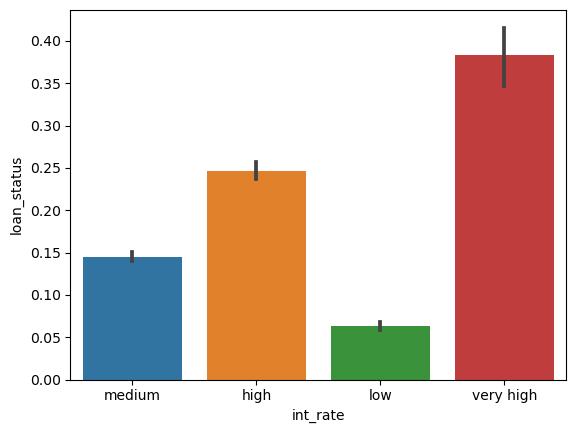

In [71]:
sns.barplot(x='int_rate', y='loan_status', data=df1)
plt.show()

In [72]:
# Observation: Higher the interest rate higher the chance of default mainly above 15%

In [73]:
df1['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [74]:
df1['annual_inc'].min()

4000.0

In [75]:
df1['annual_inc'].max() # next do the univariate analysis of the annual income

6000000.0

In [76]:
def fun2(n):
    if n<10000:
        return 'low'
    elif n>=10000 and n<50000:
        return 'medium'
    elif n>=50000 and n<90000:
        return 'high'
    elif n>=90000:
        return 'very high'

In [77]:
df1['annual_inc']=df1['annual_inc'].apply(lambda x:fun2(x))

In [78]:
df1['annual_inc'].value_counts()

high         15913
medium       13610
very high     7960
low             59
Name: annual_inc, dtype: int64

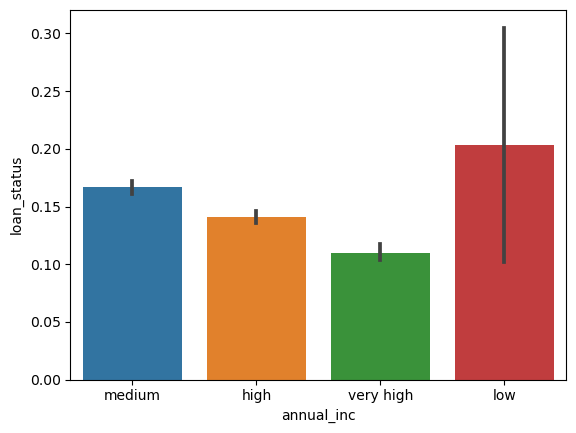

In [79]:
sns.barplot(x='annual_inc', y='loan_status', data=df1)
plt.show()

In [80]:
# Observation: Higher the income lower the chance of default

In [81]:
df1['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [82]:
df1['loan_status'].value_counts()

0    32143
1     5399
Name: loan_status, dtype: int64

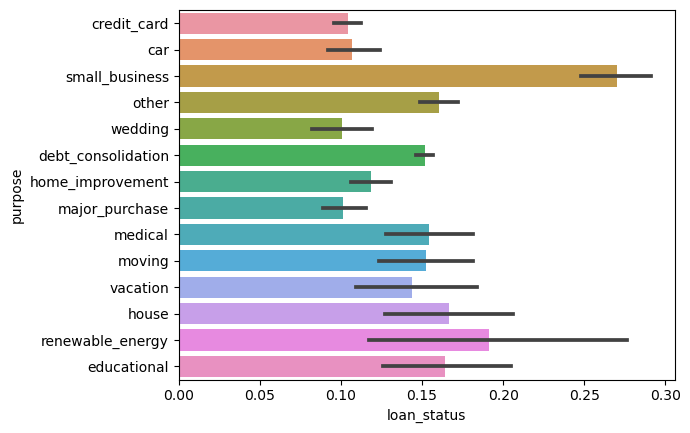

In [83]:
sns.barplot(y='purpose', x='loan_status', data=df1)
plt.show()

In [84]:
# Observation: Loans on Small Business, Educational and Renewable Energy higher the chance of default

In [85]:
df1['installment'].min()

15.69

In [86]:
df1['installment'].max()

1305.19

In [87]:
def fun3(n):
    if n<100:
        return 'low'
    elif n>=100 and n<500:
        return 'medium'
    elif n>=500 and n<1000:
        return 'high'
    elif n>=1000:
        return 'very high'

In [88]:
df1['installment']=df1['installment'].apply(lambda x:fun3(x))

In [89]:
df1['installment'].value_counts()

medium       27074
high          6492
low           3745
very high      231
Name: installment, dtype: int64

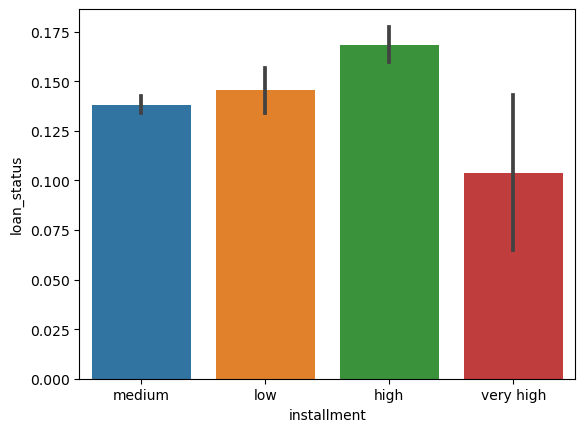

In [90]:
sns.barplot(x='installment', y='loan_status', data=df1)
plt.show()

In [91]:
# Observation: Installment amount between 500 - 1000 $ has a higher chance of default

In [92]:
#Univariate Analysis

<Axes: >

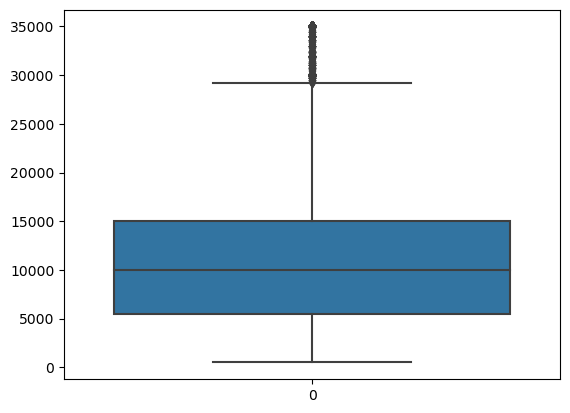

In [93]:
sns.boxplot(df['loan_amnt'])

In [ ]:
# Observation: Most loans taken are between 5000 to 15000 $

<Axes: >

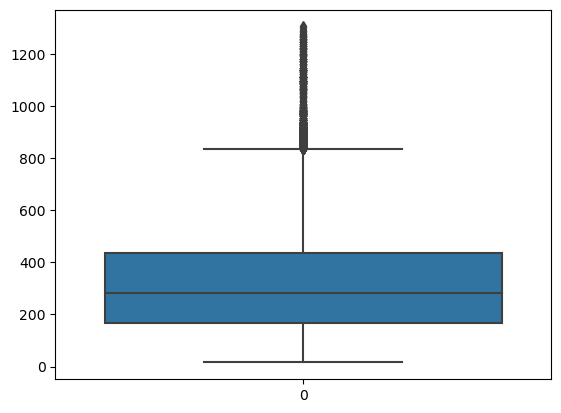

In [94]:
sns.boxplot(df['installment'])

In [ ]:
# Observation: Average installment ranges from 180 - 420 $

<Axes: xlabel='annual_inc', ylabel='Density'>

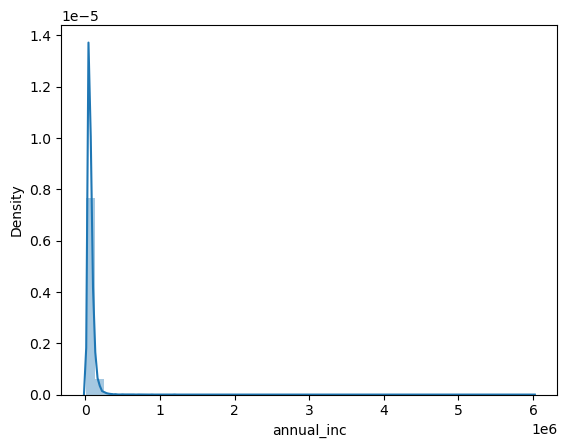

In [95]:
sns.distplot(df['annual_inc'])

<Axes: ylabel='annual_inc'>

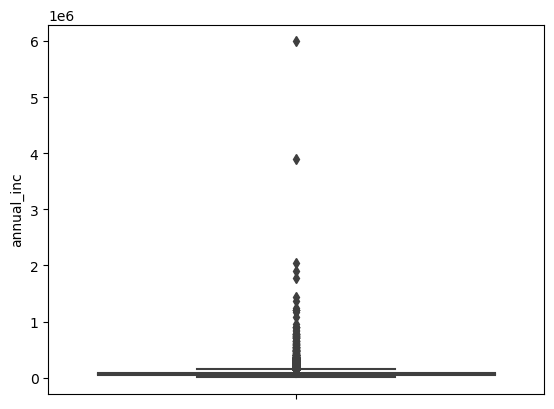

In [96]:
sns.boxplot(y=df['annual_inc'])

In [97]:
df['annual_inc'].value_counts()

60000.0     1472
50000.0     1036
40000.0      859
45000.0      813
75000.0      803
            ... 
22188.0        1
144240.0       1
13800.0        1
94860.0        1
27376.0        1
Name: annual_inc, Length: 5100, dtype: int64

<Axes: >

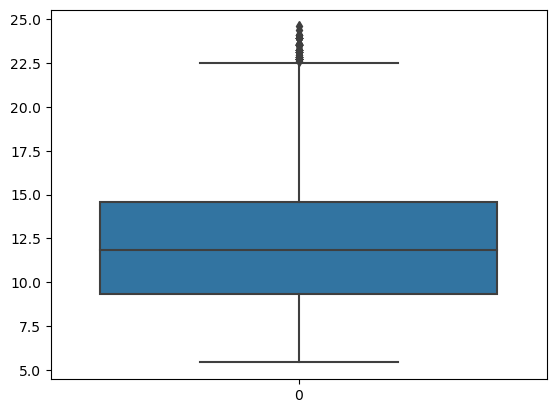

In [98]:
sns.boxplot(df['int_rate'])

In [99]:
#Observation: Interest rates for loan are mostly between 9%-15%

In [100]:
df1['dti'].min()

0.0

In [101]:
df1['dti'].max()

29.99

In [102]:
def fun4(n):
    if n<5:
        return 'low'
    elif n>=5 and n<15:
        return 'medium'
    elif n>=15 and n<25:
        return 'high'
    elif n>=25:
        return 'very high'

In [103]:
df1['dti']=df1['dti'].apply(lambda x:fun4(x))

In [104]:
df1['dti'].value_counts()

medium       17037
high         15033
low           4874
very high      598
Name: dti, dtype: int64

<Axes: xlabel='count', ylabel='dti'>

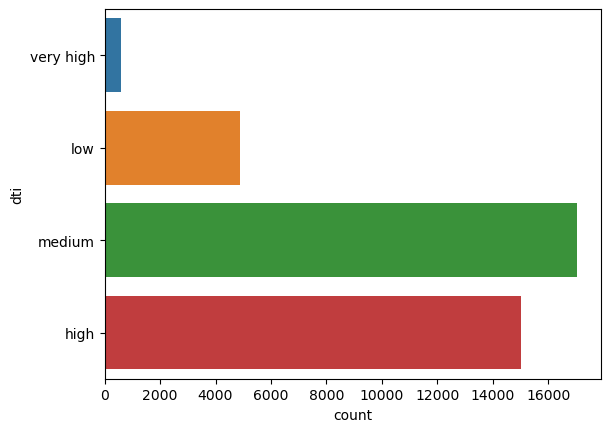

In [105]:
sns.countplot(y=df1['dti'])

<Axes: >

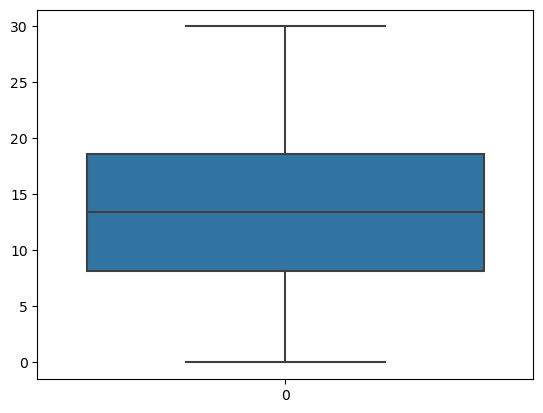

In [106]:
sns.boxplot(df['dti'])

In [ ]:
#Observation: Most dti ranges from 8 to 18

<Axes: xlabel='count', ylabel='term'>

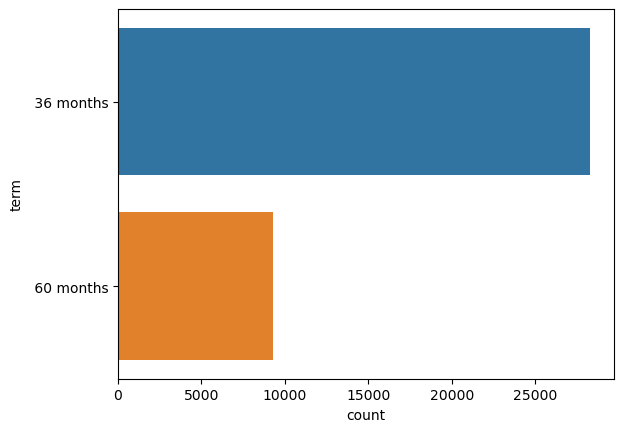

In [107]:
sns.countplot(y=df1['term'])

<Axes: xlabel='loan_status', ylabel='count'>

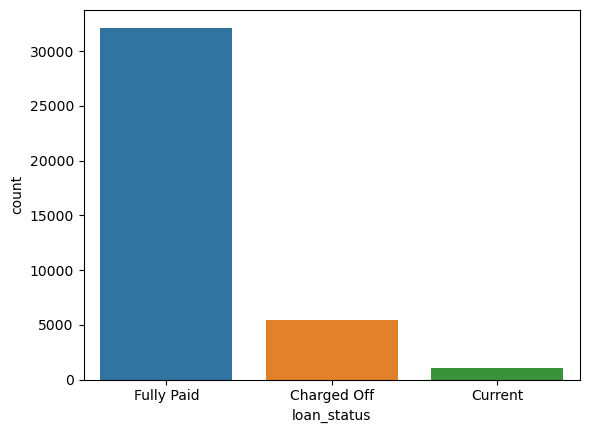

In [108]:
#Loan Status plot
sns.countplot(x='loan_status', data=df)

In [109]:
#Observations: Close to 15% of loans were charged off, ignoring the current loans

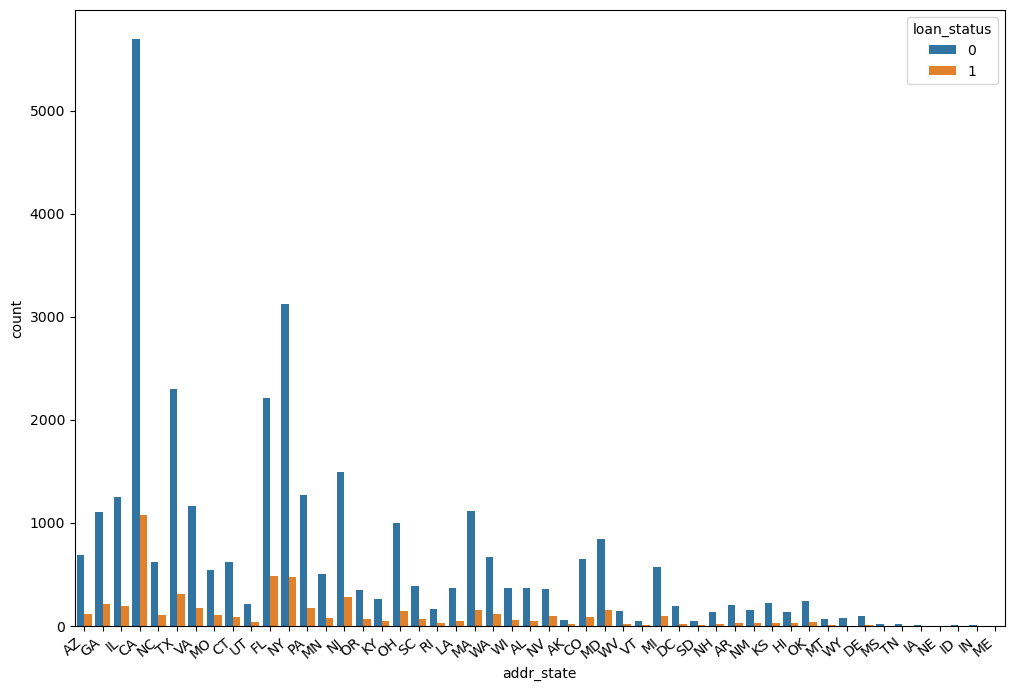

In [110]:
#State vs Charge off
plt.figure(figsize=(12,8))
ax=sns.countplot(x='addr_state', data=df1, hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [111]:
#Observation: States like CA TX FL NY NJ has the maximum charge off

In [112]:
df2=df1[df1['loan_status']!='"Fully Paid"']

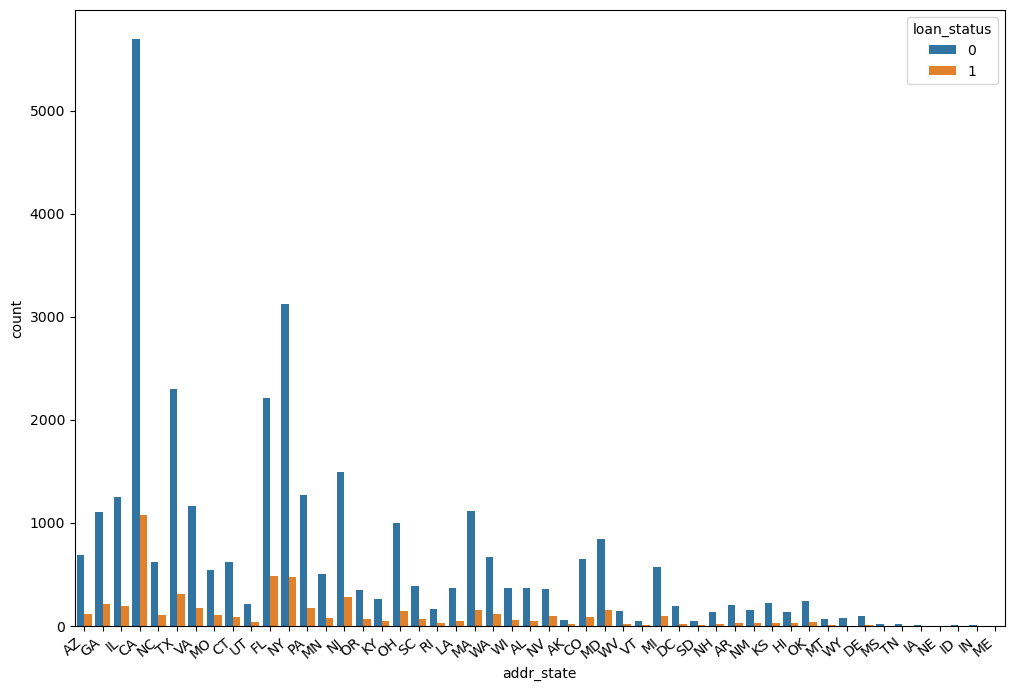

In [113]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='addr_state', data=df2, hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [114]:
df2['addr_state'].value_counts()

CA    6767
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1340
GA    1319
MA    1267
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [115]:
#df2= df2.drop(df2[df2['addr_state'].value_counts()<1000].index, axis=0)

df2['loan_status']= df1['loan_status'].apply(lambda x: 0 if x!="Fully Paid" )

<Axes: xlabel='count', ylabel='purpose'>

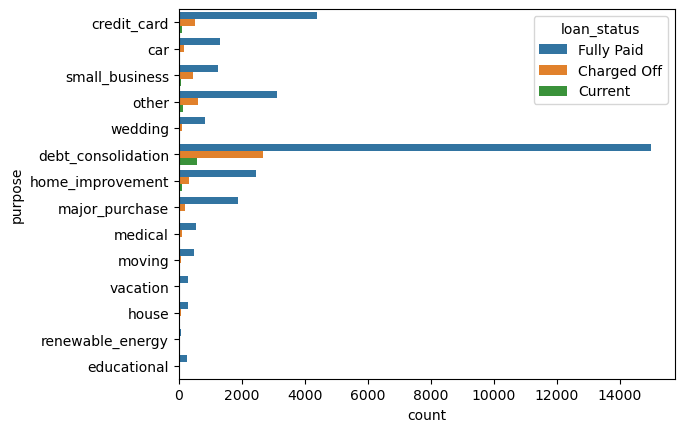

In [116]:
#Purpose of loan plot
sns.countplot(y='purpose', data=df, hue='loan_status')

In [117]:
#Observations: Most of the loans wer taken for debt consolidation & credit card bills. Charge off is high for them as well.

<Axes: xlabel='count', ylabel='home_ownership'>

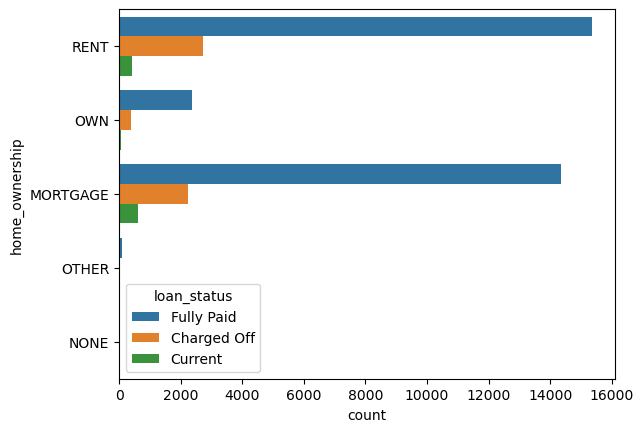

In [118]:
#Home Ownership
sns.countplot(y='home_ownership', data=df, hue='loan_status')

In [119]:
#Observations: Most of the applicats are either staying in rented property or mortgazed their home. Since applicants are high in these segments so is the Charge off.

<Axes: xlabel='term', ylabel='count'>

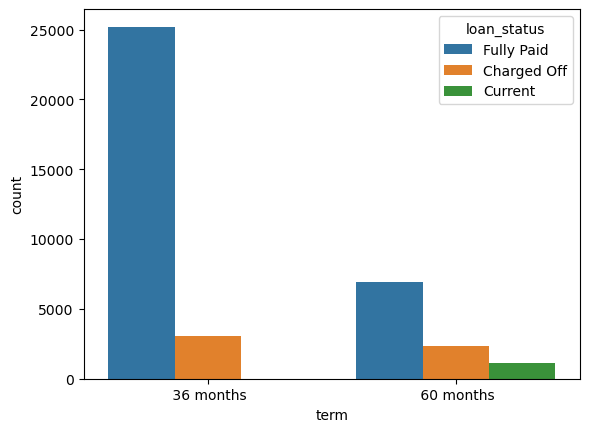

In [120]:
#Loan paying term
sns.countplot(x="term", data=df, hue='loan_status')

In [121]:
# Observation: Charge off in 60 months loan is higher for the number of applicants

In [122]:
## Overall Observations
#Bivariate Observations

# Grade D-G tend to charged off
# Longer the term increases the chance of charged off
# Home ownership dosen't directly relate to charged off
# Higher the loan amount higher the chance of charged off for loans above 20K
# Higher the interest rate higher the chance of charged off mainly above 15%
# Lower the income higher the chance of charged off
# Loans on Small Business, Educational and Renewable Energy higher the chance of charged off
# Installment amount between 500 - 1000 $ has a higher chance of charged off

#Univariate Observations
# Interest rates for loan are mostly between 10%-15%
# Close to 14% of loans were charged off
# Most of the loans wer taken for debt consolidation & credit card bills. Charge off is high for them as well.
# Most of the applicants are either staying in rented property or mortgaged their home. Since applicants are high in these segments so is the Charge off.
# States like CA TX FL NY NJ has the maximum charge off
# Charge off in 60 months loan is higher for the number of applicants